# Análisis de datos y visualización

## Proyecto académico final

- Nombres: Antonio Alfredo Alvarez Aguilar
- Fecha: 2024-05-25

In [3]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:70% !important; }</style>"))

In [1]:
pip install ucimlrepo --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost --quiet

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from ucimlrepo import fetch_ucirepo

# Iranian Churn


Este conjunto de datos se recopila aleatoriamente de la base de datos de una empresa de telecomunicaciones iraní durante un período de 12 meses.

# 1. Carga de datos

In [4]:
# Obtenemos datos desde el repositorio
iranian_churn = fetch_ucirepo(id=563) 
  
# Data frame de los datos
df = iranian_churn.data.original

# Imprimos el df
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


# 2. EDA

El data set tiene 3150 registros y 13 variables de las cuales 11 son para independientes y 2 son dependientes. No se observan valores faltantes en ninguna de las variables. Todas las variables son del tipo numerico.

In [5]:
# Revisamos el tipo de dato y si hay valores faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

Aunque todas las variables son númericas, las variables Complains, Age Group, Tariff Plan, Status y Churn son del tipo categorico por origen.

In [6]:
# Describimos los datos
df.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [7]:
# Creamos una función para gráficar de forma veloz las variables numericas

def plot_histograms_and_boxplot(data, numerical_vars):
    num_vars = len(numerical_vars)
    
    # Create a grid of plots with 1 row and 2 columns
    fig, axs = plt.subplots(num_vars, 2, figsize=(16, num_vars * 6))
    
    # Iterate through each numerical variable
    for idx, var in enumerate(numerical_vars):
        # Plot the histogram on the right side
        sns.histplot(data[var], kde=False, bins='auto', ax=axs[idx, 1])
        axs[idx, 1].set_xlabel('Frecuencia')
        axs[idx, 1].set_ylabel('')
        axs[idx, 1].set_title(f'Histograma de {var}')
        
        # Plot the boxplot on the left side
        sns.boxplot(x=data[var], ax=axs[idx, 0])
        axs[idx, 0].set_xlabel('')
        axs[idx, 0].set_ylabel('')
        axs[idx, 0].set_title(f'Diagrama de caja de {var}')
        
        # Adjust layout for better visualization
        plt.tight_layout()
    
    # Show the plot
    plt.show()

Observamos por variable:
- Call  Failure: Variable Predictiva, tiene valores atipicos a la derecha
- Complains: Variable predictiva es dicotomica.
- Subscription  Length: Variable predictiva, tiene valores atipicos a la izquierda.
- Charge  Amount: Variable predictiva, tiene valores atipicos a la derecha.
- Seconds of Use: Variable predictiva, tiene valores atipicos a la derecha.
- Frequency of use: Variable predictiva, tiene valores atipicos a la derecha.
- Frequency of SMS: Variable predictiva, tiene bastantes valores atipicos a la derecha.
- Distinct Called Numbers: Variable predictiva, tiene bastantes valores atipicos a la derecha.
- Age Group: Variable predictiva es categorica.
- Tariff Plan: Variable predictiva es dicotomica.
- Status:  Variable predictiva es dicotomica.
- Age: Variable predictiva, parece tener un comportamiento categorico.
- Customer Value: Variable dependiente, tiene valores atipicos a la derecha.
- Churn: Variable dependiente es dicotomica.

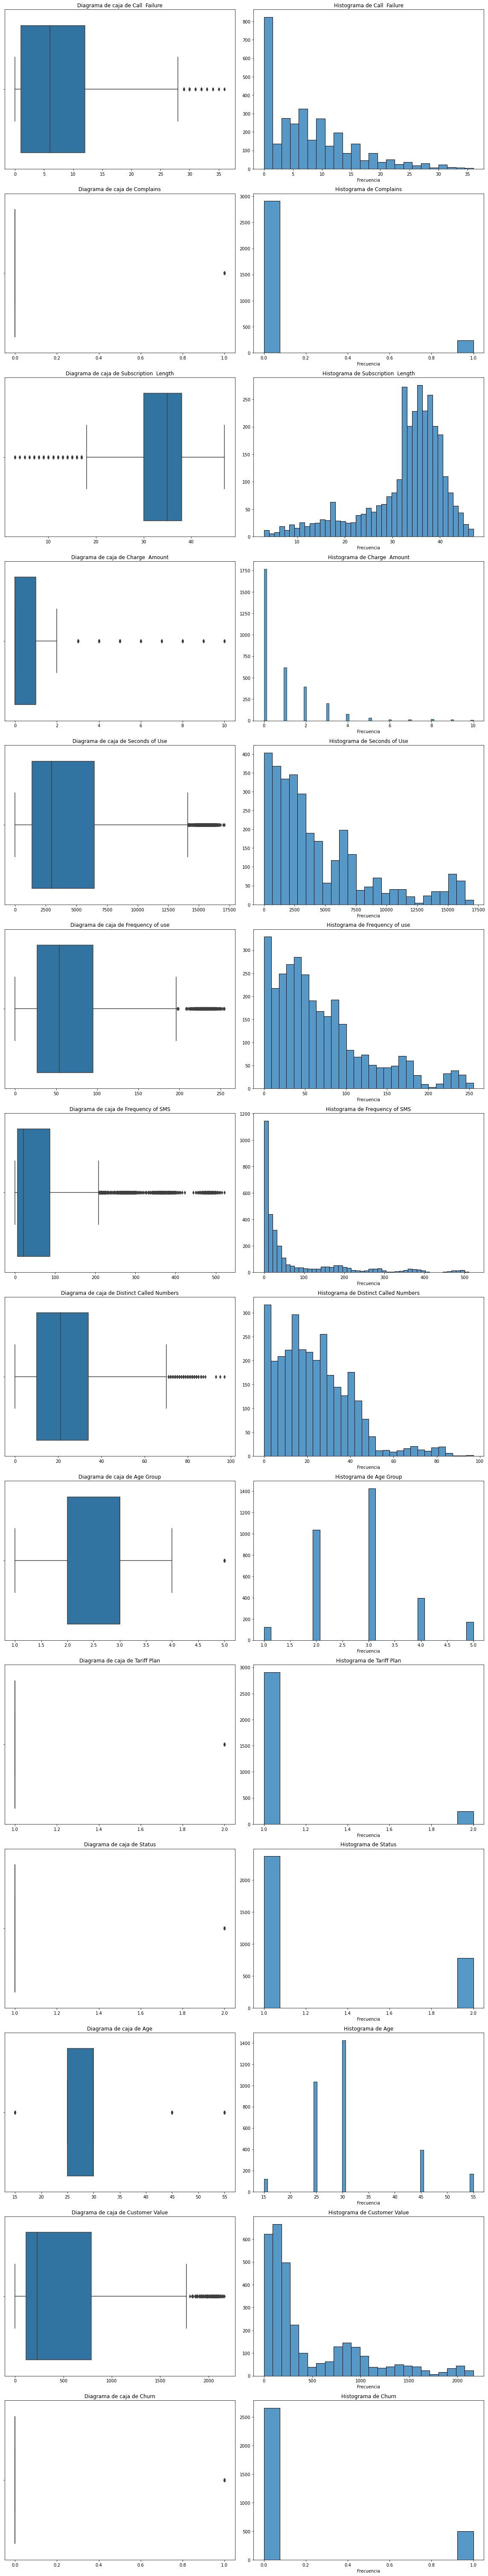

In [8]:
variables_numericas = df.columns
plot_histograms_and_boxplot(df, variables_numericas)

Concentrandonos unicamente en la variable Customer Value que es nuestra variable a predecir se observa:
- Una fuerte correlación positiva con la variable Frequency of SMS.
- Una correlación postivia baja con Seconds of Use y Frequency of Use.
- Una correlación negativa baja con Status.

In [9]:
# Correlación
df.corr()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
Call Failure,1.000000,0.152879,0.169737,0.589028,0.501607,0.573349,-0.022282,0.504058,0.050406,0.192285,-0.114645,0.041758,0.121225,-0.008987
Complains,0.152879,1.000000,-0.020286,-0.033948,-0.104952,-0.090774,-0.111633,-0.058199,0.019976,0.001140,0.271405,0.003298,-0.132895,0.532053
Subscription Length,0.169737,-0.020286,1.000000,0.078789,0.124618,0.106534,0.076318,0.092009,0.021453,-0.159680,0.142841,-0.002430,0.109565,-0.032588
Charge Amount,0.589028,-0.033948,0.078789,1.000000,0.446738,0.379096,0.091533,0.415198,0.279679,0.324232,-0.356269,0.278955,0.169428,-0.202305
Seconds of Use,0.501607,-0.104952,0.124618,0.446738,1.000000,0.946489,0.102123,0.676536,0.020060,0.133593,-0.460618,0.020843,0.415087,-0.298935
Frequency of use,0.573349,-0.090774,0.106534,0.379096,0.946489,1.000000,0.100019,0.736114,-0.032544,0.206452,-0.454752,-0.028350,0.401572,-0.303337
Frequency of SMS,-0.022282,-0.111633,0.076318,0.091533,0.102123,0.100019,1.000000,0.079650,-0.053719,0.195686,-0.296164,-0.092798,0.924877,-0.220754
Distinct Called Numbers,0.504058,-0.058199,0.092009,0.415198,0.676536,0.736114,0.079650,1.000000,0.020941,0.172079,-0.413039,0.051037,0.284807,-0.278867
Age Group,0.050406,0.019976,0.021453,0.279679,0.020060,-0.032544,-0.053719,0.020941,1.000000,-0.150593,0.002506,0.960758,-0.183481,-0.014550
Tariff Plan,0.192285,0.001140,-0.159680,0.324232,0.133593,0.206452,0.195686,0.172079,-0.150593,1.000000,-0.164143,-0.119426,0.252298,-0.105853


# 3. Preparación de datos

Las variables ya son del tipo numericas por lo que no hace falta una transformación a número. Al ser la variable a predecir Customer Value y esta poseer bastantes valores atipicos, no se procede a realizar preparacion de datos. Se procede a separar el data set entre variables predictivas y variables dependientes. También se separan los datos de entrenamiento de los de prueba.

In [10]:
# Copiamos el dataset antes de manipular
df_mod = df.copy()

# Eliminamos variables predicitva que se no va a usar
df_mod = df_mod.drop("Churn", axis = 1)

# Separar el data set
X = df_mod.iloc[:, :-1]
y = df_mod.iloc[:, -1:]

# Separar el data set en entrenamient y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True, random_state=123)

In [11]:
y_test

,Customer Value
1275,98.760
1828,0.000
1642,246.015
2034,1492.650
2896,415.200
...,...
2788,910.120
1376,110.250
1188,858.465
2579,135.350


# 4. Análisis predictivo

Para este trabajo se aplicaran dos modelos predictivos:
- Random Forest
- XGBoost

## 4.1 Random Forest

Random Forest es un algoritmo de aprendizaje automático basado en árboles de decisión. Se caracteriza por ser un conjunto (ensemble) de múltiples árboles de decisión entrenados con diferentes subconjuntos del dataset y características. La idea principal es combinar la predicción de varios árboles para mejorar la precisión y reducir el riesgo de sobreajuste.

In [12]:
# Crear el modelo de Random Forest
rf_model = RandomForestRegressor(random_state=123)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

C:\Users\noako\anaconda3\envs\directml\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(random_state=123)

## 4.2 XGBoost

XGBoost, que significa "Extreme Gradient Boosting", es una biblioteca optimizada de aprendizaje automático basada en el algoritmo de boosting de gradiente. Es conocida por su eficiencia, velocidad y rendimiento en tareas de clasificación y regresión. En boosting, se combinan múltiples modelos débiles (por lo general, árboles de decisión) para crear un modelo fuerte. Cada modelo adicional intenta corregir los errores de los modelos anteriores.

In [13]:
# Crear el modelo de XGBoost para regresión
xgb_model = xgb.XGBRegressor(
    random_state=123
)
# Entrenar el modelo
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=123,
             reg_alpha=0, reg_lambda=1, ...)

# 5. Evaluación

Comprobamos que los modelos tienen un nivel de predicción del 99%. XGBoost es el modelo con mejor ajuste teniendo un error cuadratico medio cerca de un 40% menor que el modelo de Random Forest.

In [14]:
# Bosques aleatorios
# Realizar predicciones
rf_predictions = rf_model.predict(X_test)

# Evaluar el modelo
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print(f'Mean Squared Error de Random Forest: {rf_mse}')
print(f'R^2 Score de Random Forest: {rf_r2}')

# XGBoost
# Realizar predicciones
xgb_predictions = xgb_model.predict(X_test)

# Evaluar el modelo
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
print(f'Mean Squared Error de XGBoost: {xgb_mse}')
print(f'R^2 Score de XGBoost: {xgb_r2}')


Mean Squared Error de Random Forest: 1085.0711432358084
R^2 Score de Random Forest: 0.9958483945576904
Mean Squared Error de XGBoost: 665.5492644523682
R^2 Score de XGBoost: 0.9974535329174954


Graficamente también se pude observar como el modelo de XGBoost predice mejor los picos que el modelo por Random Forest.

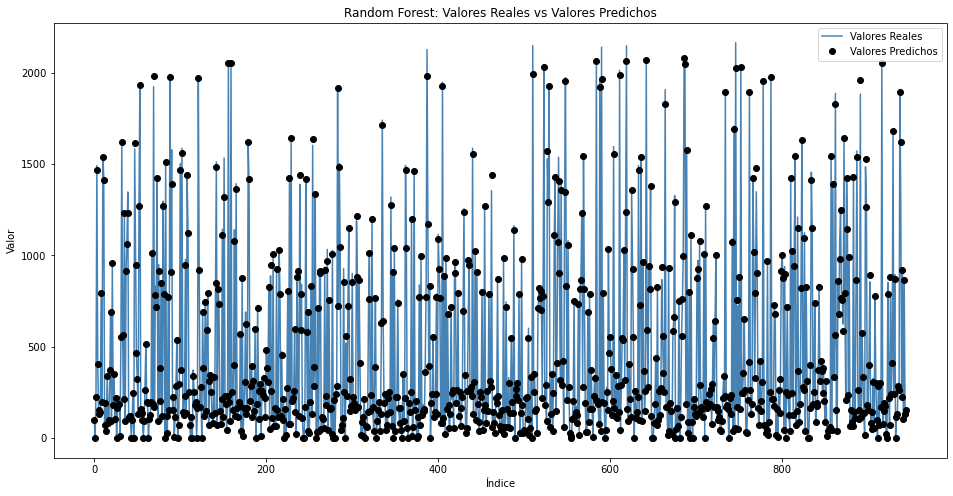

In [15]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(16, 8))  # Ajusta el tamaño para que ocupe más espacio horizontal

# Graficar los valores reales como línea azul
pd.Series(y_test.values.ravel()).plot(color='steelblue', label='Valores Reales')

# Graficar los valores predichos como puntos negros
pd.Series(rf_predictions.tolist()).plot(marker="o", linewidth=0, color='black', label='Valores Predichos')

# Añadir título y etiquetas
plt.title('Random Forest: Valores Reales vs Valores Predichos')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()

# Mostrar el gráfico
plt.show()

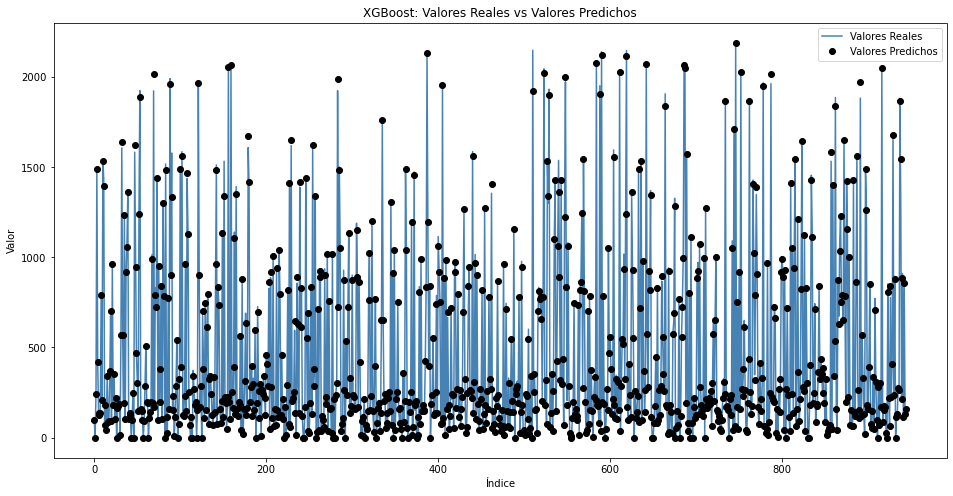

In [16]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(16, 8))  # Ajusta el tamaño para que ocupe más espacio horizontal

# Graficar los valores reales como línea azul
pd.Series(y_test.values.ravel()).plot(color='steelblue', label='Valores Reales')

# Graficar los valores predichos como puntos negros
pd.Series(xgb_predictions.tolist()).plot(marker="o", linewidth=0, color='black', label='Valores Predichos')

# Añadir título y etiquetas
plt.title('XGBoost: Valores Reales vs Valores Predichos')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()

# Mostrar el gráfico
plt.show()